# import  the libraries

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')

# Read the data

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
geeks=pd.read_csv("greeks.csv")

# EDA

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [4]:
train.isna().sum().sort_values(ascending=False)

EL       60
BQ       60
CC        3
FS        2
CB        2
FL        1
FC        1
DU        1
GL        1
EE        0
EB        0
EU        0
DY        0
EH        0
EJ        0
DV        0
EP        0
EG        0
Id        0
DL        0
FD        0
FE        0
FI        0
FR        0
GB        0
GE        0
GF        0
GH        0
GI        0
DN        0
DH        0
DI        0
BR        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BZ        0
AB        0
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
Class     0
dtype: int64

features EL,BQ,CC,FS,CB,FL,FC,DU,GL has null values

In [5]:
train.duplicated().sum()

0

# Handling missing data

In [6]:
def handle_null(df,columns=None):
    df=df
    if columns==None:
        columns=list(df.columns)
    for col in columns:
        #print("columns={}\n".format(col))
        df[col]=df[col].fillna(df[col].median())
    return df

In [7]:
train=handle_null(train,['EL','BQ','CC','FS','CB','FL','FC','DU','GL'])

# Check for multocolinearity

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [9]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [10]:
X=train.drop(['Class','Id','EJ'],axis=1)

v=calc_vif(X)
dc=list(v[v.VIF>=5]['variables'])
train=train.drop(dc,axis=1)

# categorical data:feature engineering

In [11]:
train.select_dtypes(include='object')

,Id,EJ
0,000ff2bfdfe9,B
1,007255e47698,A
2,013f2bd269f5,B
3,043ac50845d5,B
4,044fb8a146ec,B
...,...,...
612,fd3dafe738fd,A
613,fd895603f071,B
614,fd8ef6377f76,A
615,fe1942975e40,B


In [12]:
train['EJ'].value_counts()

B    395
A    222
Name: EJ, dtype: int64

In [13]:
train=train.drop('Id',axis=1)

<AxesSubplot: xlabel='EJ', ylabel='count'>

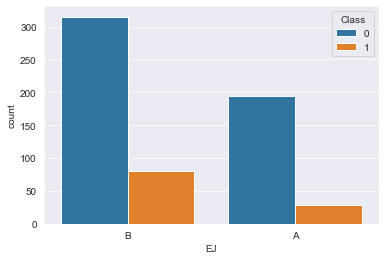

In [14]:
sns.countplot(train,x='EJ',hue='Class')

In [15]:
train=pd.get_dummies(train,columns=['EJ'],drop_first=True)

# check for balanced data

<AxesSubplot: xlabel='Class', ylabel='count'>

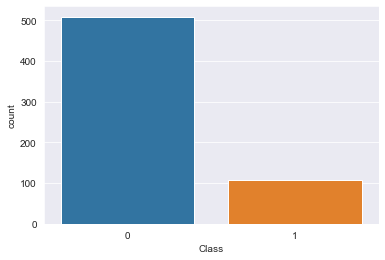

In [16]:
sns.countplot(train,x='Class')

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
os=SMOTE()

In [19]:
os.fit(train.drop('Class',axis=1),train['Class'])

SMOTE()

In [20]:
X,y=os.fit_resample(train.drop('Class',axis=1),train['Class'])

In [21]:
y.value_counts()

1    509
0    509
Name: Class, dtype: int64

# Model building

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
from sklearn.model_selection import GridSearchCV,train_test_split

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=45)

In [27]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [30]:
accuracy_score(y_test,y_pred)

0.9411764705882353